In [1]:
# %reset
# %load_ext autoreload
# %autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import itertools

from info.core.info import info
%matplotlib inline

In [2]:
# Generate the joint PDF for the die rolling
die1, die2 = np.arange(1,7), np.arange(1,7)
# diescomb = list(itertools.product(die1, die2))
diesadd = [(x, y, x+y) for x in die1 for y in die2]
# diesadd = [(comb[0], comb[1], comb[0]+comb[1]) for comb in diescomb]
adddie = np.arange(1, 13)

pdfs = np.zeros([6,6,12])
for i in range(1, 7):
    for j in range(1, 7):
        if (i, j, i+j) in diesadd:
            pdfs[i-1, j-1, i+j-1] += 1
pdfs = pdfs / np.sum(pdfs)

In [3]:
# Compute PID
pid=info(ndim=3, pdfs=pdfs, base=2, conditioned=False)
pid.allInfo

II          1.895523e+00
Itotal      3.274402e+00
R(Z;Y,X)    2.368875e-16
S(Z;Y,X)    1.895523e+00
U(Z,X)      6.894394e-01
U(Z,Y)      6.894394e-01
Rmin        0.000000e+00
Isource     3.435943e-16
RMMI        6.894394e-01
dtype: float64

In [4]:
# Compute SPID
pid2=info(ndim=3, pdfs=pdfs, base=2, conditioned=False, specific=True)
pid2.allInfo

II          1.895523
Itotal      3.274402
R(Z;Y,X)    0.000000
S(Z;Y,X)    1.895523
U(Z,X)      0.689439
U(Z,Y)      0.689439
Rmin        0.000000
Isource     0.000000
RMMI        0.566405
dtype: float64

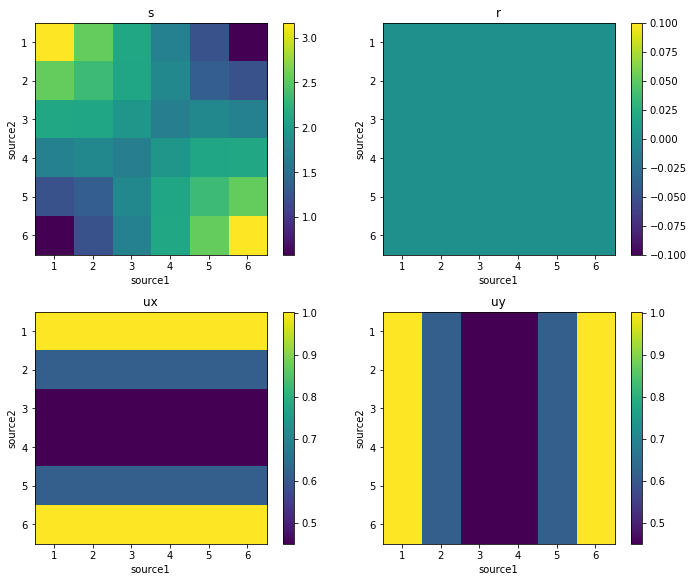

In [5]:
# Plot the contours of s, r, ux and uy
def plot_spid(ss, rs, uxs, uys):
    f, axes = plt.subplots(2, 2, figsize=(10, 8))
    # s
    ax = axes[0,0]
    ims = ax.imshow(ss)
    ax.set_title('s')
    ax.set_xticks(range(6))
    ax.set_xticklabels(range(1,7))
    ax.set_yticks(range(6))
    ax.set_yticklabels(range(1,7))
    ax.set_xlabel('source1')
    ax.set_ylabel('source2')
    plt.colorbar(ims, ax=ax)
    # r
    ax = axes[0,1]
    ims = ax.imshow(rs)
    ax.set_title('r')
    ax.set_xticks(range(6))
    ax.set_xticklabels(range(1,7))
    ax.set_yticks(range(6))
    ax.set_yticklabels(range(1,7))
    ax.set_xlabel('source1')
    ax.set_ylabel('source2')
    plt.colorbar(ims, ax=ax)
    # ux
    ax = axes[1,0]
    ims =  ax.imshow(uxs)
    ax.set_title('ux')
    ax.set_xticks(range(6))
    ax.set_xticklabels(range(1,7))
    ax.set_yticks(range(6))
    ax.set_yticklabels(range(1,7))
    ax.set_xlabel('source1')
    ax.set_ylabel('source2')
    plt.colorbar(ims, ax=ax)
    # uy
    ax = axes[1,1]
    ims = ax.imshow(uys)
    ax.set_title('uy')
    ax.set_xticks(range(6))
    ax.set_xticklabels(range(1,7))
    ax.set_yticks(range(6))
    ax.set_yticklabels(range(1,7))
    ax.set_xlabel('source1')
    ax.set_ylabel('source2')
    plt.colorbar(ims, ax=ax)
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    return f, axes

f, axes = plot_spid(pid2.ss, pid2.rs, pid2.uxzs, pid2.uyzs)

In [6]:
# Plots for explanations

In [7]:
# print np.sum(pdfs, axis=(1))[0, :]
# print np.sum(pdfs, axis=(1))[2, :]
# print np.sum(pdfs, axis=(0,1))
# print np.sum(pdfs, axis=(1,2))
# print np.sum(pdfs, axis=(0,2))
# # print np.sum(pid2.ss, axis=(1))

In [8]:
# print pid2.ixsz
# print '---' * 25
# print pid2.iysz
# print '---' * 25
# print pid2.itots
# print '---' * 25
# print pid2.iis